# Geometric Mean, Standard Deviation and Coefficient of Variation for S&P 500

We will use some of the knowledge that we have gained in our BADM 210 classes and PAL sessions, to apply in real world data. </br>
Today we are going to use the historical data of the IVV ETF that reflects the returns of the S&P 500, to compute some statistics. </br>
The **big goal** of this is to **motivate** the **students** to study and appreciate the theory that is presented to us in the classes, by showing that there are cool applications for it.

### Importing the Libraries

In [79]:
import math
import pandas as pd
import seaborn as sbn
import yfinance as yf
import matplotlib.pyplot as plt

### Getting and Cleaning the Data

In [24]:
asset = 'IVV'
security = yf.Ticker(asset).history(period="max")[["Close", "Volume"]]
security.Close = security.Close.pct_change()
security.Close.iloc[0] = 0
security

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Close,Volume
Date,,
2000-05-19,0.000000,775500
2000-05-22,-0.006220,1850600
2000-05-23,-0.015198,373900
2000-05-24,0.014979,400300
2000-05-25,-0.009168,69600
...,...,...
2022-01-13,-0.013719,5351100
2022-01-14,0.000343,9652900
2022-01-18,-0.017675,9681700


### Plotting (Because it is always nice to plot)

#### S&P 500 returns

<ipython-input-27-85b5b3a685d0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  yaxis = plot.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


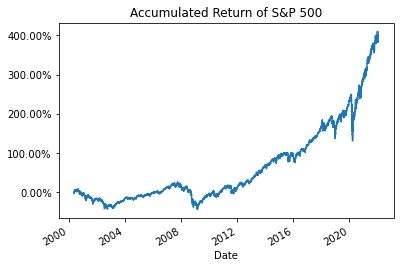

In [27]:
plot = ((security.Close+1).cumprod()-1).plot(title = "Accumulated Return of S&P 500")
vals = plot.get_yticks()
yaxis = plot.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

#### Histogram of the Returns

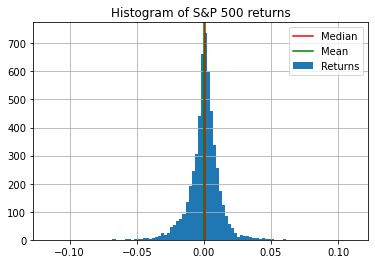

In [52]:
median = security.Close.median()
mean = security.Close.mean()

security.Close.hist(bins = 100, label = "Returns")
plt.axvline(x=median, color = "r", label = "Median")
plt.axvline(x=mean, color = "g", label = "Mean")
plt.title('Histogram of S&P 500 returns')
plt.legend()

### Plotting the Daily Volume for S&P 500

Text(0.5, 1.0, 'Histogram of S&P 500 Daily Volume')

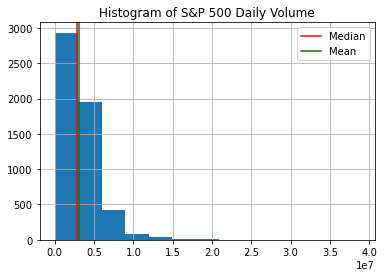

In [95]:
median = security.Volume.median()
mean = security.Volume.mean()

n = len(security.Close)
k = math.log(n, 2)
k = math.trunc(k)+1

security.Volume.hist(bins = k)
plt.axvline(x=median, color = "r", label = "Median")
plt.axvline(x=mean, color = "g", label = "Mean")
plt.legend()
plt.title('Histogram of S&P 500 Daily Volume')

Text(0.5, 1.0, 'Daily Volume of S&P 500 (Time series)')

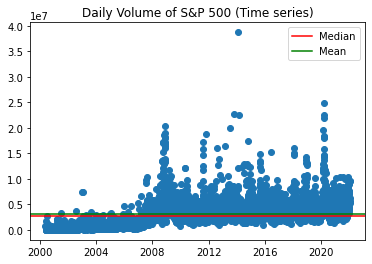

In [97]:
plt.scatter(security.index, security.Volume)
plt.axhline(y=median, color = "r", label = "Median")
plt.axhline(y=mean, color = "g", label = "Mean")
plt.legend()
plt.title("Daily Volume of S&P 500 (Time series)")

### Computing the Geometric Mean for the Returns

So using this formulas we are going to compute the Daily Average Historical Return of S&P 500 in the period.

</br>

$$ Return = \frac{FinalValue}{InitialValue}\ - 1 $$

</br>

$$ GeometricMean = (Return + 1)^{1/n} - 1$$


In [120]:
n = len(security.Close)

acc_return = (security.Close+1).cumprod().iloc[-1]
daily = (acc_return + 1) ** (1/n) - 1
print(f'Daily Average Return: {round(daily*100, 3)}%')

Daily Average Return: 0.032%


Note that if we have the daily return, to get the monthly and annual we just need to compound it. So:

$$ Monthly = (Daily+1)^{30} - 1$$
</br>
$$ Annual = (Daily+1)^{360} - 1$$

In [121]:
monthly = (1+daily)**30-1
annual = (1+daily)**360-1

print(f'Monthly Average Return: {round(monthly*100, 3)}%')
print(f'Annual Average Return: {round(annual*100, 3)}%')

Monthly Average Return: 0.976%
Annual Average Return: 12.363%


### Computing the Standard Deviation

In python we have easy ways to compute the standard deviation, but it is important to note that in finance we usually use the annualized volatility.

In [129]:
standard_deviation = security.Close.std()

ann_sd = standard_deviation * (360**0.5)
print(f'Annualized Volatility: {round(ann_sd*100, 3)}%')

Annualized Volatility: 23.072%


### Computing the Mean and Standard Deviation for the Volume

In [140]:
mean_volume = security.Volume.mean()
sd_volume = security.Volume.std()

print(f'Mean of the volumes: {round(mean_volume)} \nStandard Deviation: {round(sd_volume)}')

Mean of the volumes: 3080809 
Standard Deviation: 2713172


## Comparing the Coefficient of Variation from Both

As they are measures of different units, in order to compare them we need to use the Coefficient of Variation (CV).

$$ CV = \frac{StandDev}{Mean}\  $$

In [158]:
cv_return = ann_sd / annual
cv_volume = sd_volume / mean_volume

print(f'Coefficient of Variation for: \nVolume = {round(cv_volume*100 , 3)}%\nReturn = {round(cv_return*100, 3)}%')

Coefficient of Variation for: 
Volume = 88.067%
Return = 186.624%


## Conclusion

We can see that both have a great variability, but the Returns vary more than the Volume of the transactions.